## Project Setup 

In [31]:
import sys
import os

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [32]:
from src.constants import (
    FASHION_TRAIN_DATA_PATH,
    FASHION_TEST_DATA_PATH,
    FASHION_LOGISTIC_MODEL_PATH,
    FASHION_KMEANS_MODEL_PATH
)

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Load Dataset - First Phase

In [33]:
train_df = pd.read_csv(FASHION_TRAIN_DATA_PATH)
test_df = pd.read_csv(FASHION_TEST_DATA_PATH)

# EDA - Second Phase

### Fashion-MNIST images are 28x28 pixels → 784 features (plus 1 label)

In [34]:
train_df.head(7)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0


## 1. Structure of dataset

In [35]:
# train dataset
f"images No.: {train_df.shape[0]} , pixels per image: {train_df.shape[1]}"

'images No.: 60000 , pixels per image: 785'

In [36]:
# test dataset
f"images No.: {test_df.shape[0]} , pixels per image: {test_df.shape[1]}"

'images No.: 10000 , pixels per image: 785'

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


##### Columns are int64 datatype. 

In [38]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## 2. Check values

In [39]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

##### As we see , there are columns we can't know if itis null or not , so we will count it again , but by True/False method . To count True Null values :

In [40]:
# any -> True , sum -> count
train_df.isnull().any().sum()

np.int64(0)

In [41]:
train_df.duplicated().sum()

np.int64(43)

##### Duplicated columns : 43 , we can remove it in preprocessing phase .

## 3. Understand target column

In [42]:
train_df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

##### Classes from 0 -> 9

In [43]:
train_df['label'].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

## 4. Distribution of Target Column

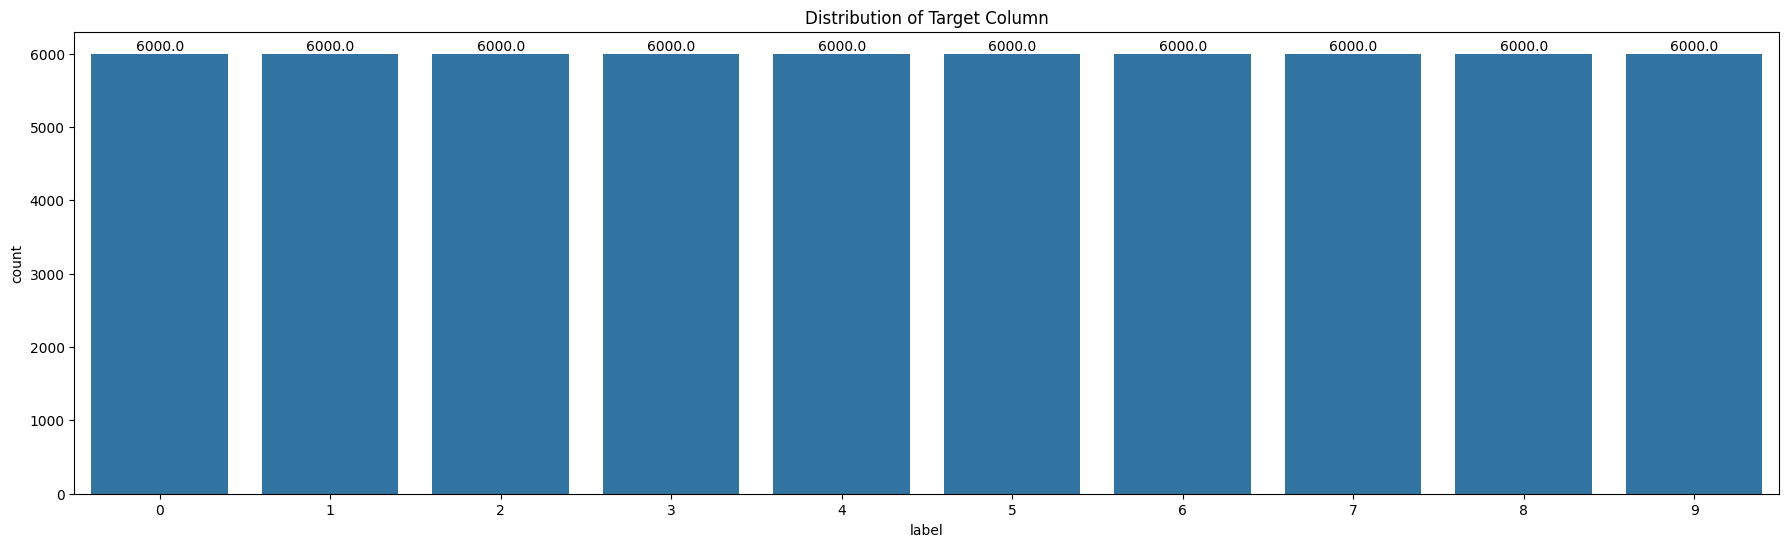

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22,6))

ax = sns.countplot(x='label', data=train_df)
plt.title("Distribution of Target Column")

# Add counts on top of each label
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.show()

##### All labels has same distribution , not imbalanced data . which is good 

# Preprocessing & Feature Engineering - Third Phase

##### We will start with removing duplicates 

In [45]:
train_df.drop_duplicates(inplace=True)

In [46]:
train_df.duplicated().sum()

np.int64(0)

## Get Features
#### based on "we have only numerical feature , so we don't need other transformer other scalar " , we can use standard for this . but first let's get the target column

In [ ]:
numeric_features = train_df.drop(columns=['label']).columns.tolist()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
            ('scaler', StandardScaler(),numeric_features),
    ]
)

#### Column transformer usually we use it for grouping some processing on dataset to make more easy to perform on train & test , use it in pipeline also with model training . 

### But because we have only numeric feature , so we don't should use it . but it is useful .

## Dimensions

### Our images is 28 * 28 , which means 785 features , which mean also 785 weight to calculate . which is very very huge for traditional ml models .
#### So we need to reduce these 785 and also choose the important features only , to make the model train well . 

### Logistic Regression

In [ ]:
# For this task we use PCA to reduce the dimensionality of the dataset
# since we have only numerical features, we apply StandardScaler followed by PCA in a pipeline within pipeline

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


logistic_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('pca', PCA(n_components=100)),
    ('classifier', LogisticRegression(max_iter=1000))
])

### KMeans

In [ ]:
from sklearn.cluster import KMeans

kmeans_pipeline = Pipeline([
    ('preprocessor', preprocessor),      
    ('pca', PCA(n_components=100)), 
    ('kmeans', KMeans(n_clusters=10, random_state=42))
])

### By this we perform PCA & Preprocessing & Training in one Pipeline . 

# Training - Fourth Phase

## On Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['label'])
y = train_df['label']

# Split the data into training and validation sets
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_val = test_df.drop(columns=['label'])
y_val = test_df['label']

# Fit the pipeline on the training data
logistic_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Evaluation - Last Phase

### Accuracy of training / Validation data

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on validation set
y_val_pred = logistic_pipeline.predict(X_val)


val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.8482


### Confusion Matrix & Report

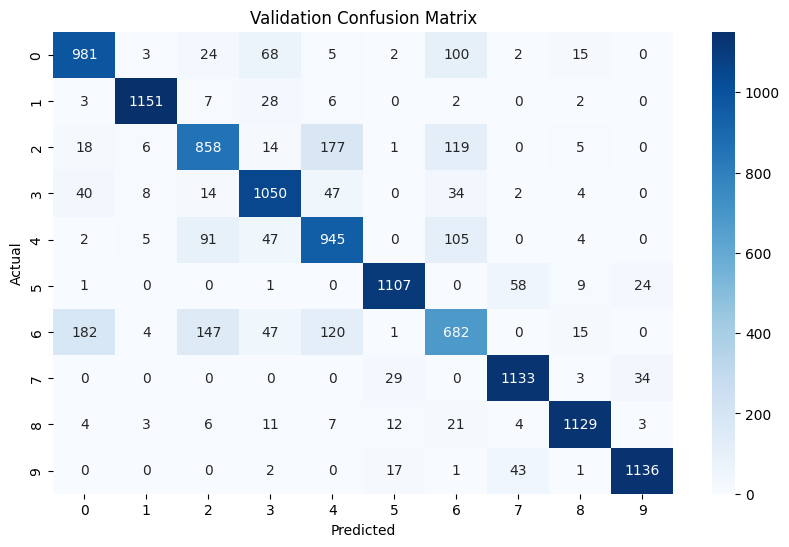


Classification Report of Train/Validation:

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1200
           1       0.98      0.96      0.97      1199
           2       0.75      0.72      0.73      1198
           3       0.83      0.88      0.85      1199
           4       0.72      0.79      0.75      1199
           5       0.95      0.92      0.93      1200
           6       0.64      0.57      0.60      1198
           7       0.91      0.94      0.93      1199
           8       0.95      0.94      0.95      1200
           9       0.95      0.95      0.95      1200

    accuracy                           0.85     11992
   macro avg       0.85      0.85      0.85     11992
weighted avg       0.85      0.85      0.85     11992



In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

print("\nClassification Report of Train/Validation:\n")
print(classification_report(y_val,y_val_pred))

### ROC 

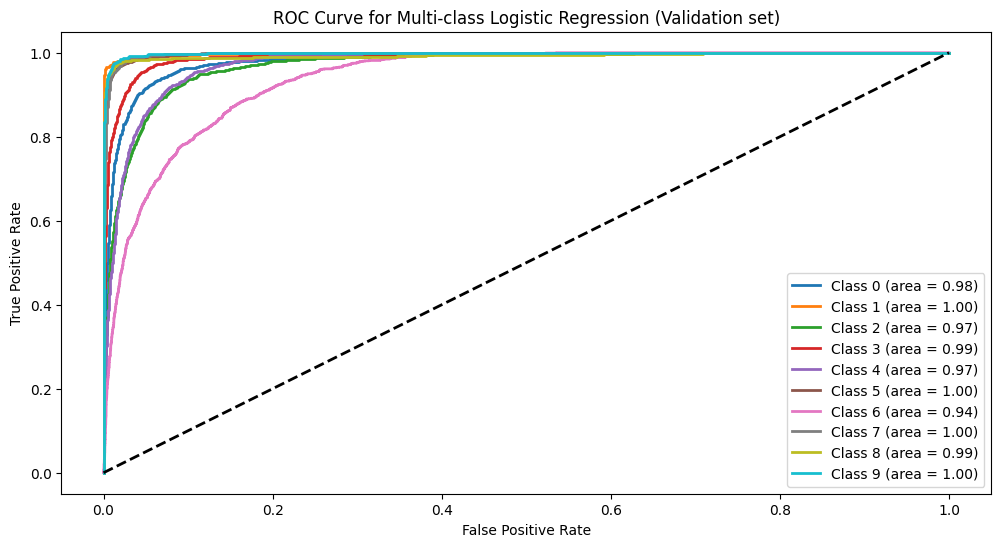

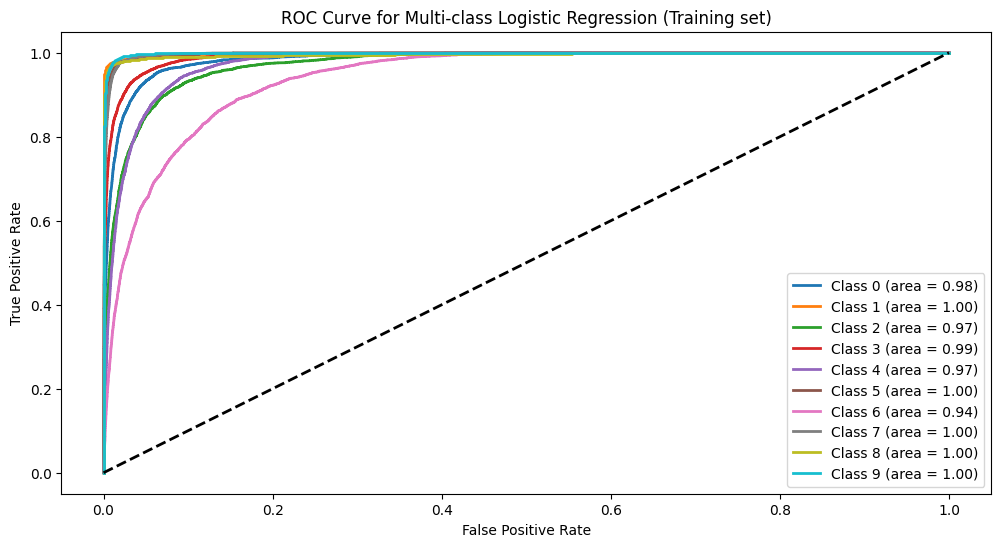

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np


# Binarize the output labels for multi-class ROC
y_val_bin = label_binarize(y_val, classes=np.arange(10)) 
y_train_bin = label_binarize(y_train, classes=np.arange(10))

# Predict probabilities
y_val_proba = logistic_pipeline.predict_proba(X_val)
y_train_proba = logistic_pipeline.predict_proba(X_train)

plt.figure(figsize=(12, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_val_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Logistic Regression (Validation set)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_train_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Logistic Regression (Training set)')
plt.legend(loc='lower right')
plt.show()


## On KMeans

In [ ]:
X = train_df.drop(columns=['label'])

kmeans_pipeline.fit(X)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Accuracy

In [ ]:
# Train clusters
k_means_train = train_df.drop(columns=['label'])
y_means_train = train_df['label']
train_clusters = kmeans_pipeline.predict(k_means_train)

# Test clusters
k_means_test = test_df.drop(columns=['label'], errors='ignore')
y_means_test = test_df['label']
test_clusters = kmeans_pipeline.predict(k_means_test)

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

print("Train ARI:", adjusted_rand_score(y_means_train, train_clusters))
print("Train NMI:", normalized_mutual_info_score(y_means_train, train_clusters))


print("Test ARI:", adjusted_rand_score(y_means_test, test_clusters))
print("Test NMI:", normalized_mutual_info_score(y_means_test, test_clusters))

Train ARI: 0.33470571478834926
Train NMI: 0.4880679402765327
Test ARI: 0.3330472597520712
Test NMI: 0.48571321236562637


## Cross-Validation

In [ ]:
from sklearn.model_selection import  cross_val_score

cv_scores = cross_val_score(logistic_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.850516   0.8419681  0.85228813 0.84665902 0.84697175]
Mean CV accuracy: 0.8476806004378193


#### Save models

In [ ]:
import joblib

joblib.dump(logistic_pipeline,FASHION_LOGISTIC_MODEL_PATH)
joblib.dump(kmeans_pipeline,FASHION_KMEANS_MODEL_PATH)

print("Pipeline saved successfully!")

Pipeline saved successfully!
